<a href="https://colab.research.google.com/github/rinermdhn/ARIMA-Forecasting-and-Modelling-for-JPMorgan-Stock-Price/blob/main/ARIMA_Pre_processing_and_EVDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
file_path = '/content/JPM-PD.csv'
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       57 non-null     object 
 1   Open       57 non-null     float64
 2   High       57 non-null     float64
 3   Low        57 non-null     float64
 4   Close      57 non-null     float64
 5   Adj Close  57 non-null     float64
 6   Volume     57 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,25.309999,25.320000,24.500000,24.879999,18.146599,27242159
1,2018-11-01,24.900000,24.990000,24.219999,24.730000,18.240324,7841467
2,2018-12-01,24.870001,25.030001,24.325001,25.030001,18.461599,6554682
3,2019-01-01,25.030001,25.870001,24.680000,24.900000,18.365713,11130199
4,2019-02-01,25.020000,25.740000,24.969999,25.389999,18.996325,8064784


# EDA


In [ ]:
null_summary = data.isnull().sum()
print(null_summary)
if data.isnull().values.any():
    print("There are null values in the dataset.")
else:
    print("There are no null values in the dataset.")

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
There are no null values in the dataset.


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,57.0,2.623105e+01,1.219478e+00,2.334000e+01,2.500000e+01,2.651000e+01,2.729000e+01,2.818000e+01
High,57.0,2.676084e+01,1.201174e+00,2.469000e+01,2.559000e+01,2.700000e+01,2.782000e+01,2.875000e+01
Low,57.0,2.558283e+01,1.437342e+00,2.200000e+01,2.450000e+01,2.600000e+01,2.686000e+01,2.762000e+01
Close,57.0,2.621298e+01,1.231466e+00,2.317000e+01,2.503000e+01,2.651000e+01,2.725000e+01,2.825000e+01
Adj Close,57.0,2.172550e+01,1.474875e+00,1.814660e+01,2.101702e+01,2.216072e+01,2.294805e+01,2.380342e+01
Volume,57.0,4.147991e+06,3.898483e+06,1.807757e+06,2.314530e+06,3.009923e+06,3.856129e+06,2.724216e+07


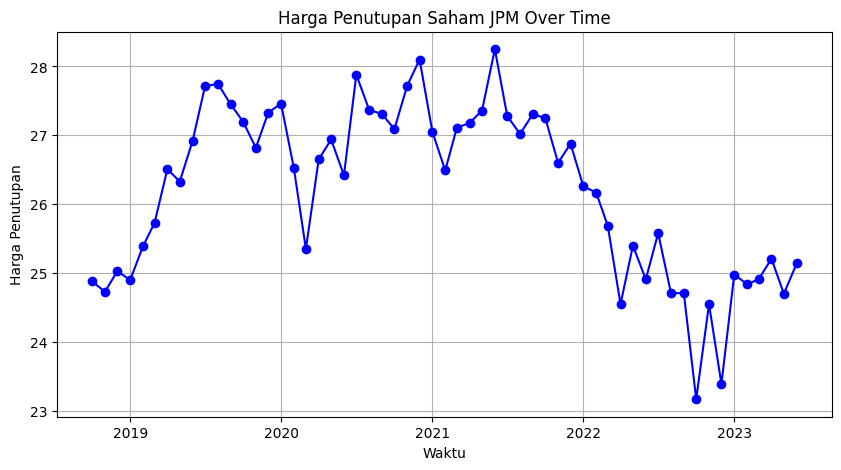

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], marker='o', linestyle='-', color='b')
plt.title('Harga Penutupan Saham JPM Over Time')
plt.xlabel('Waktu')
plt.ylabel('Harga Penutupan')
plt.grid(True)
plt.show()

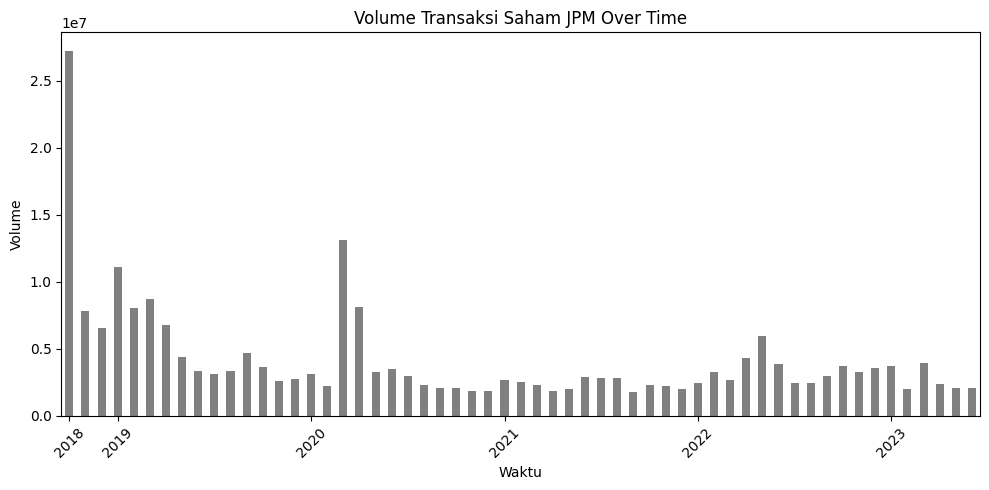

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
ax = data['Volume'].plot(kind='bar', color='gray')
plt.title('Volume Transaksi Saham JPM Over Time')
plt.xlabel('Waktu')
plt.ylabel('Volume')

years = data.index.year.unique()
years_locs = [data.index.get_loc(data.index[data.index.year == year][0]) for year in years]

ax.xaxis.set_major_locator(ticker.FixedLocator(years_locs))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(data.index[int(x)].year) if int(x) < len(data.index) else ''))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

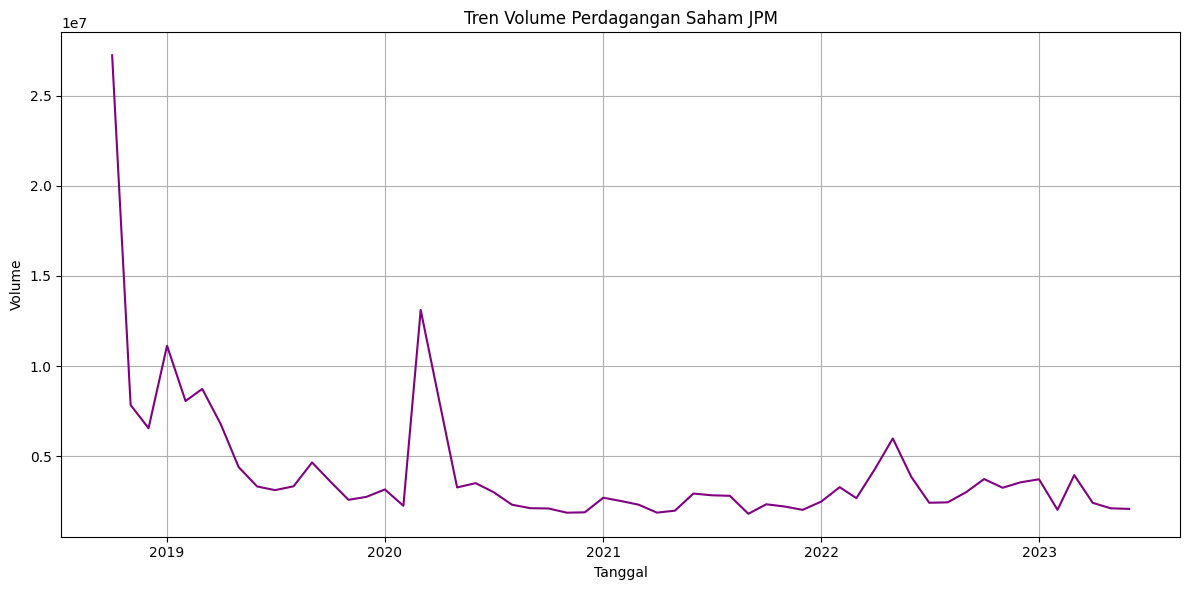

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data.index, data['Volume'], color='purple')
ax.set_title('Tren Volume Perdagangan Saham JPM')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Volume')
ax.grid(True)

plt.tight_layout()
plt.show()

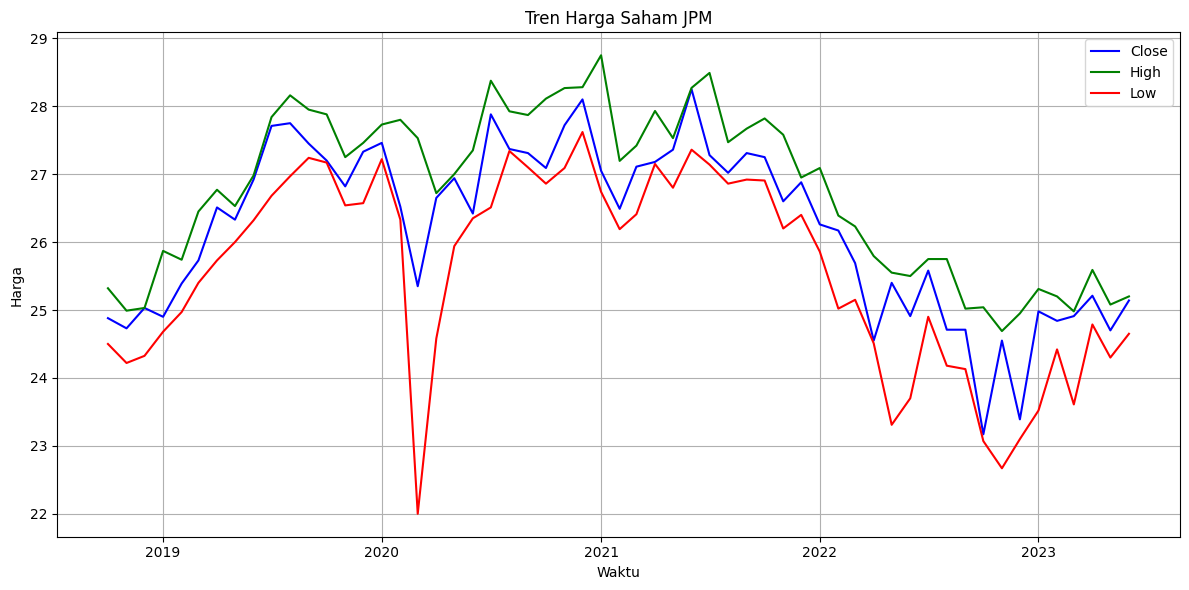

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data.index, data['Close'], label='Close', color='blue')
ax.plot(data.index, data['High'], label='High', color='green')
ax.plot(data.index, data['Low'], label='Low', color='red')
ax.set_title('Tren Harga Saham JPM')
ax.set_xlabel('Waktu')
ax.set_ylabel('Harga')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

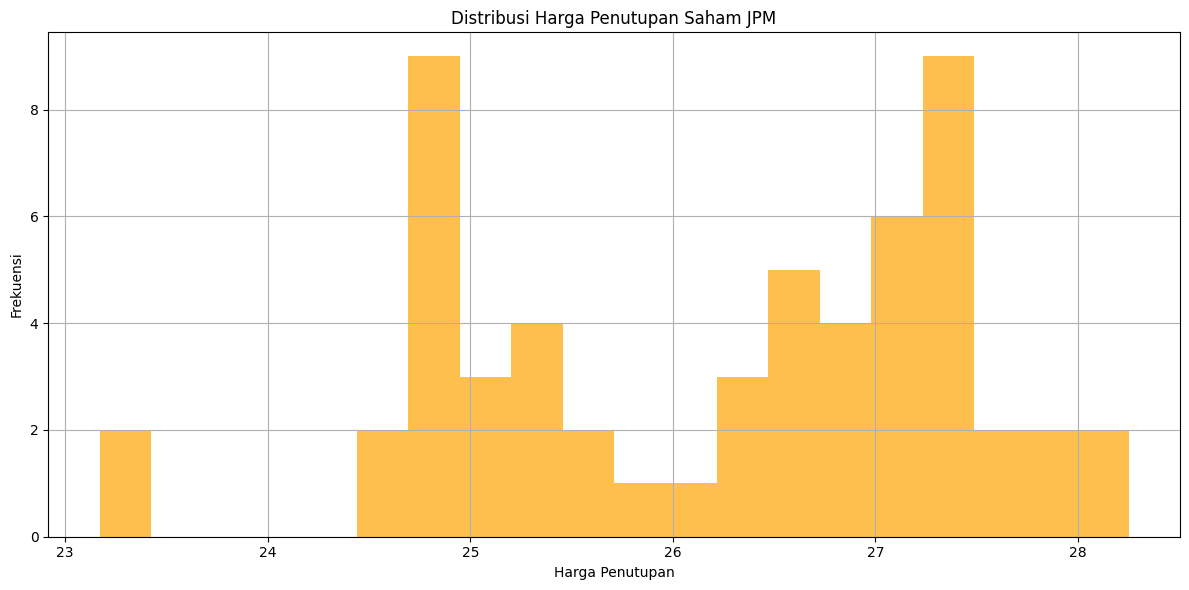

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['Close'], bins=20, color='orange', alpha=0.7)
plt.title('Distribusi Harga Penutupan Saham JPM')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

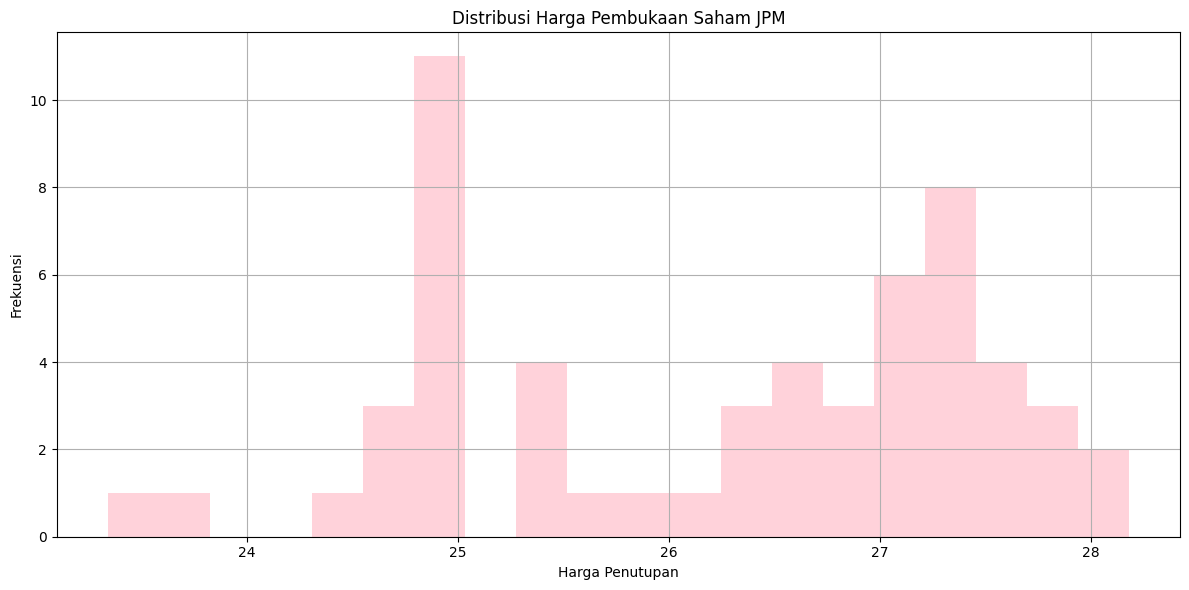

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['Open'], bins=20, color='pink', alpha=0.7)
plt.title('Distribusi Harga Pembukaan Saham JPM')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

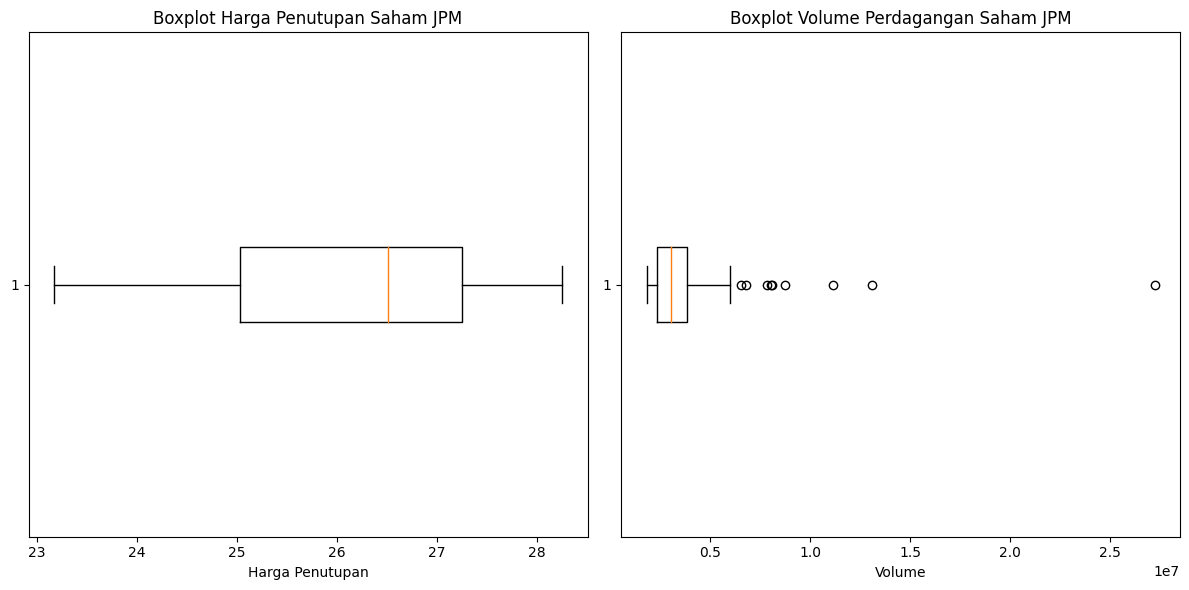

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data['Close'], vert=False)
ax[0].set_title('Boxplot Harga Penutupan Saham JPM')
ax[0].set_xlabel('Harga Penutupan')

ax[1].boxplot(data['Volume'], vert=False)
ax[1].set_title('Boxplot Volume Perdagangan Saham JPM')
ax[1].set_xlabel('Volume')

plt.tight_layout()
plt.show()